# Sentimental Analysis of Text Data : Neutral and Negative

by Jahnavi Mishra

Tech Stack:
1. Python Programming Language
2. Natural Language Processing
3. Machine Learning Classifiers

Steps:
1. Data Cleaning and Pre Processing
2. EDA and Visualization ( in another file)
3. Feature Extraction
4. Sampling
5. Model Building and Training Phase


In [33]:
import string
import math
import pandas as pd
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
# Dataset from - https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection
df = pd.read_csv('sentiments.csv',
                   header=None,
                   names=['textID', 'text', 'sentiment'])

# Printing out first 5 columns
df.head()

,textID,text,sentiment
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,neutral
1,f358968122,I have to go clothes shopping tomorrow I hate...,negative
2,449e7733f1,i am bored. :| any idea`s of a nice site?,neutral
3,6099baf6e8,I don`t think will want to come back (guys r...,negative
4,f946da7a04,_thomas if only the drinking game was tonight....,neutral


In [3]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18899 entries, 0 to 18898
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   textID     18899 non-null  object
 1   text       18898 non-null  object
 2   sentiment  18899 non-null  object
dtypes: object(3)
memory usage: 443.1+ KB


In [4]:
df.isnull().sum().head() 

textID       0
text         1
sentiment    0
dtype: int64

In [5]:
df['sentiment'].value_counts()

neutral     11118
negative     7781
Name: sentiment, dtype: int64

In [6]:
df1 = df.dropna()
df1.isnull().sum().head()

textID       0
text         0
sentiment    0
dtype: int64

In [7]:
df1['text'].unique()

array(['that`s enough! I`ll do nothing for 2 hours.',
       "I have to go clothes shopping tomorrow  I hate it, but I have a serious 'clothes falling apart' situation here.",
       'i am bored. :| any idea`s of a nice site?', ...,
       'Last night in Australia', 'painting',
       'Is in bed not able to sleep  bloody bipolar!'], dtype=object)

# Data Cleaning Phase:

1. Expanding Contractions: Eg. can't becomes can not

In [8]:
# Dictionary of English Contractions
import re
pd.options.mode.chained_assignment = None  # default='warn'

contractions_dict = { "ain't": "are not","'s":" is","aren't": "are not",
                     "can't": "cannot","can't've": "cannot have",
                     "'cause": "because","could've": "could have","couldn't": "could not",
                     "couldn't've": "could not have", "didn't": "did not","doesn't": "does not",
                     "don't": "do not","hadn't": "had not","hadn't've": "had not have",
                     "hasn't": "has not","haven't": "have not","he'd": "he would",
                     "he'd've": "he would have","he'll": "he will", "he'll've": "he will have",
                     "how'd": "how did","how'd'y": "how do you","how'll": "how will",
                     "I'd": "I would", "I'd've": "I would have","I'll": "I will",
                     "I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not",
                     "it'd": "it would","it'd've": "it would have","it'll": "it will",
                     "it'll've": "it will have", "let's": "let us","ma'am": "madam",
                     "mayn't": "may not","might've": "might have","mightn't": "might not", 
                     "mightn't've": "might not have","must've": "must have","mustn't": "must not",
                     "mustn't've": "must not have", "needn't": "need not",
                     "needn't've": "need not have","o'clock": "of the clock","oughtn't": "ought not",
                     "oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not",
                     "shan't've": "shall not have","she'd": "she would","she'd've": "she would have",
                     "she'll": "she will", "she'll've": "she will have","should've": "should have",
                     "shouldn't": "should not", "shouldn't've": "should not have","so've": "so have",
                     "that'd": "that would","that'd've": "that would have", "there'd": "there would",
                     "there'd've": "there would have", "they'd": "they would",
                     "they'd've": "they would have","they'll": "they will",
                     "they'll've": "they will have", "they're": "they are","they've": "they have",
                     "to've": "to have","wasn't": "was not","we'd": "we would",
                     "we'd've": "we would have","we'll": "we will","we'll've": "we will have",
                     "we're": "we are","we've": "we have", "weren't": "were not","what'll": "what will",
                     "what'll've": "what will have","what're": "what are", "what've": "what have",
                     "when've": "when have","where'd": "where did", "where've": "where have",
                     "who'll": "who will","who'll've": "who will have","who've": "who have",
                     "why've": "why have","will've": "will have","won't": "will not",
                     "won't've": "will not have", "would've": "would have","wouldn't": "would not",
                     "wouldn't've": "would not have","y'all": "you all", "y'all'd": "you all would",
                     "y'all'd've": "you all would have","y'all're": "you all are",
                     "y'all've": "you all have", "you'd": "you would","you'd've": "you would have",
                     "you'll": "you will","you'll've": "you will have", "you're": "you are",
                     "you've": "you have"}

# Regular expression for finding contractions
contractions_re=re.compile('(%s)' % '|'.join(contractions_dict.keys()))

# Function for expanding contractions
def expand_contractions(text,contractions_dict=contractions_dict):
  def replace(match):
    return contractions_dict[match.group(0)]
  return contractions_re.sub(replace, text)

# Expanding Contractions in the reviews
df1['text']=df1['text'].apply(lambda x:expand_contractions(x))

2. Converting the text to lower case: for uniformity as in NLP, Hello and hEllO are treated as different

In [9]:
df1['cleaned']=df1['text'].apply(lambda x: x.lower())

3. Removing digits and numbers and characters from the text.

In [10]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('\w*\d\w*','', x))

4. Removing punctuations from the text

In [11]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))

5. Removing extra spaces from the text

In [12]:
df1['cleaned']=df1['cleaned'].apply(lambda x: re.sub(' +',' ',x))

In [13]:
for index,text in enumerate(df1['cleaned'][35:40]):
  print('text %d:\n'%(index+1),text)

text 1:
 my mom wants to lay well be there later probably a little after and im sorry youre sick
text 2:
 sometimes knowledge is not a good thing httpdiggcom
text 3:
  me and my moms cars were broken into i feel violated
text 4:
 we are going all out
text 5:
 m do it up


6. Label Encoding: For binary classification

In [14]:
# Changing 'negative' to 0 and 'neutral' to 1
df1['sentiment'] = df1.sentiment.map({'negative':0, 'neutral':1})

# Get an idea of the size of the dataset
print(df1.shape)

# Previewing
df1.head()

(18898, 4)


,textID,text,sentiment,cleaned
0,2a0463352b,that`s enough! I`ll do nothing for 2 hours.,1,thats enough ill do nothing for hours
1,f358968122,I have to go clothes shopping tomorrow I hate...,0,i have to go clothes shopping tomorrow i hate ...
2,449e7733f1,i am bored. :| any idea`s of a nice site?,1,i am bored any ideas of a nice site
3,6099baf6e8,I don`t think will want to come back (guys r...,0,i dont think will want to come back guys read ...
4,f946da7a04,_thomas if only the drinking game was tonight....,1,thomas if only the drinking game was tonighti ...


In [15]:
df1= df1.drop(['textID', 'text'], axis=1)


In [16]:
df1.head()

,sentiment,cleaned
0,1,thats enough ill do nothing for hours
1,0,i have to go clothes shopping tomorrow i hate ...
2,1,i am bored any ideas of a nice site
3,0,i dont think will want to come back guys read ...
4,1,thomas if only the drinking game was tonighti ...


7. Removing Stopwords from the text

Stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 
We would not want these words to take up space in our database, or taking up valuable processing time. 

In [17]:
from collections import Counter
def remove_stopword(text):
    stop_words = stopwords.words('english')
    stopwords_dict = Counter(stop_words)
    text = ' '.join([word for word in text.split() if word not in stopwords_dict])
    return text

In [18]:
def tokenise(text):
    words = word_tokenize(text) 
    return words

In [19]:
df1['cleaned']=df1['cleaned'].apply(lambda x: remove_stopword(x))

In [20]:
df1.head()

,sentiment,cleaned
0,1,thats enough ill nothing hours
1,0,go clothes shopping tomorrow hate serious clot...
2,1,bored ideas nice site
3,0,dont think want come back guys read dms
4,1,thomas drinking game tonighti dont work till t...


# Feature Extraction

# Tfidf Vectorizer:  

In order to process natural language, the text must be represented as a numerical feature. The process of transforming text into a numerical feature is called text vectorization. TF-IDF is one of the most popular text vectorizers, the calculation is very simple and easy to understand. It gives the rare term high weight and gives the common term low weight.
It is a numerical statistic that reflects how important a word is to a document in a collection or corpus.


I  will use TF-IDF to vectorize our text data before feeding them to machine learning algorithms.

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df1 ['cleaned'])

In [22]:
y = df1[['sentiment']]

# Sampling: Using SMOTE

Oversampling the unbalanced data 

In [23]:
from imblearn.over_sampling import SMOTE

su = SMOTE(random_state=42)
X_su, y_su = su.fit_resample(X, y)

In [24]:
print(y_su["sentiment"].value_counts())

1    11117
0    11117
Name: sentiment, dtype: int64


# Model Building


The three classifiers I have used are Naive Bayes, Logistic Regression and Gradient Boosting Classifier
I went through various previous works and resources and got to know that the most commonly used classifiers for sentimental analysis are NB, Logistic Regression, SVM and GBM and XGBoost.

The performance metrics used are:
1. Confusion Matrix
2. Precision, Recall and F1_score

Cross Validation is done to check the robustness of the models
Hyperparameter Tuning is done using GridSearchCV 

In [25]:

# split into training and testing sets
# USE from sklearn.model_selection import train_test_split to avoid seeing deprecation warning.
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_su, 
                                                    y_su, 
                                                    random_state=1)


print('Number of rows in the training set: {}'.format(x_train.shape[0]))
print('Number of rows in the test set: {}'.format(x_test.shape[0]))

Number of rows in the training set: 16675
Number of rows in the test set: 5559


# Naive Bayes Classifier

In [31]:
#Cross Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score

def get_auc_CV(model):
    """
    Return the average AUC score from cross-validation.
    """
    # Set KFold to shuffle data before the split
    kf = StratifiedKFold(5, shuffle=True, random_state=1)

    # Get AUC scores
    auc = cross_val_score(
        model, x_train, y_train.values.ravel(), scoring="roc_auc", cv=kf)

    return auc.mean()

Best alpha:  3.4


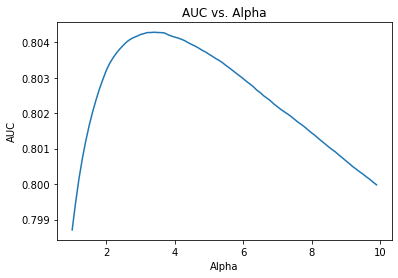

In [34]:
#Hyperparameter Tuning
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB

res = pd.Series([get_auc_CV(MultinomialNB(i))
                 for i in np.arange(1, 10, 0.1)],
                index=np.arange(1, 10, 0.1))

best_alpha = np.round(res.idxmax(), 2)
print('Best alpha: ', best_alpha)

plt.plot(res)
plt.title('AUC vs. Alpha')
plt.xlabel('Alpha')
plt.ylabel('AUC')
plt.show()

In [36]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
naive_bayes = MultinomialNB(alpha=3.4)
naive_bayes.fit(x_train,y_train.values.ravel())
print('Accuracy of Naive Bayes: {:.3f}'.format(naive_bayes.score(x_test, y_test)))
predictions1= naive_bayes.predict(x_test)
print(classification_report(y_test, predictions1))

Accuracy of Naive Bayes: 0.739
              precision    recall  f1-score   support

           0       0.74      0.74      0.74      2814
           1       0.73      0.74      0.74      2745

    accuracy                           0.74      5559
   macro avg       0.74      0.74      0.74      5559
weighted avg       0.74      0.74      0.74      5559



In [40]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
y_predict = naive_bayes.predict(x_test)
confusion_matrix(y_test,y_predict)



array([[2183,  631],
       [ 805, 1940]], dtype=int64)

In [65]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
f1_NB = f1_score(y_test, predictions1 ,average='micro')

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print('F1-score: {}'.format(np.round(f1_NB,4)))

Precision: 75.46%
Recall: 70.67%
F1-score: 0.7417


# Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
logreg = LogisticRegression(C=0.5,max_iter=150,n_jobs=10,random_state=None)
logreg.fit(x_train,y_train.values.ravel())
print('Accuracy of Logistic Regression: {:.3f}'.format(logreg.score(x_test, y_test)))
predictions2= logreg.predict(x_test)
print(classification_report(y_test, predictions2))

Accuracy of Logistic Regression: 0.735
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      2814
           1       0.71      0.79      0.75      2745

    accuracy                           0.74      5559
   macro avg       0.74      0.74      0.73      5559
weighted avg       0.74      0.74      0.73      5559



In [66]:
y_predict = logreg.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[1908,  906],
       [ 567, 2178]], dtype=int64)

In [67]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
f1_LR = f1_score(y_test, predictions1 ,average='micro')

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print('F1-score: {}'.format(np.round(f1_LR,4)))

Precision: 70.62%
Recall: 79.34%
F1-score: 0.7417


In [71]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

LR_accuracies = cross_val_score(estimator = logreg, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_Logreg : ", LR_accuracies.mean())


Mean_Acc_Logreg :  0.7295953039607905


# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier 
gbc = GradientBoostingClassifier(n_estimators=600, learning_rate=0.5, max_features=10, max_depth=10, random_state=0)
gbc=gbc.fit(x_train, y_train.values.ravel())
predictions3 =gbc.predict(x_test)
print('Accuracy of the GBM on test set: {:.3f}'.format(gbc.score(x_test, y_test)))
print(classification_report(y_test, predictions3))

Accuracy of the GBM on test set: 0.751
              precision    recall  f1-score   support

           0       0.77      0.72      0.75      2814
           1       0.73      0.78      0.76      2745

    accuracy                           0.75      5559
   macro avg       0.75      0.75      0.75      5559
weighted avg       0.75      0.75      0.75      5559



In [68]:
y_predict = gbc.predict(x_test)
confusion_matrix(y_test,y_predict)

array([[2035,  779],
       [ 607, 2138]], dtype=int64)

In [69]:
tn, fp, fn, tp = confusion_matrix(y_test,y_predict).ravel()
f1_GBM = f1_score(y_test, predictions1 ,average='micro')

print("Precision: {:.2f}%".format(100 * precision_score(y_test, y_predict)))
print("Recall: {:.2f}%".format(100 * recall_score(y_test, y_predict)))
print('F1-score: {}'.format(np.round(f1_GBM,4)))

Precision: 73.29%
Recall: 77.89%
F1-score: 0.7417


In [74]:
#Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=10, random_state=1, shuffle=True)

GBM_accuracies = cross_val_score(estimator = gbc, X = x_train, y = y_train.values.ravel(), cv = cv)
print("Mean_Acc_Logreg : ", GBM_accuracies.mean())

Mean_Acc_Logreg :  0.7388895602174529


In [60]:
#Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV


p_test= {'learning_rate':[0.05,0.1,0.5], 'n_estimators':[100,250,500],'max_depth':[4,6,10]}

tuning = GridSearchCV(estimator =GradientBoostingClassifier(min_samples_split=500, min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=10), 
            param_grid = p_test, scoring='accuracy',n_jobs=4,cv=10,verbose=4)
tuning.fit(x_train,y_train)

print('The best Parameters are:',tuning.best_params_)
print('The best score is:',tuning.best_score_)

Fitting 10 folds for each of 27 candidates, totalling 270 fits


C:\Users\misja\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


The best Parameters are: {'learning_rate': 0.5, 'max_depth': 10, 'n_estimators': 500}
The best score is: 0.7692961407718457


# Conclusion

The results and the evaluation metrics like precision and recall and accuracy can be improved by even better methods for data cleaning and pre
processing techniques.

GBM is the best performer followed Naive Bayes and Logistic Regression.
But pre trained NLP Model BERT can also be used which might give better results using these models as the baseline for the performance evaluation.

1. Textblobs can be used to find the polarity of the sentiments.
2. Using VADER SentimentIntensityAnalyser is also an option
3. The pre trained NLP model BERT might give better results than the supervised learning classifiers in ML.
4. WordDictionary based model can be used in which labeled n-corpus is formed.